In [1]:
%run twisted_graphene.py

In [2]:
g=TwistedBilayerGraphene(1,0)

In [3]:
g.set_kpath(g.path_GMKG,[100,100,100])

In [4]:
def t_intra(x1,y1,x2,y2):
    """
    Intralayer hoppings of graphene.
    
    (x1,y1) and (x2,y2) are the initial and final positions, respectively.
    """
    a=2.46 #Angstrom. Lattice constant of graphene
    x=x2-x1
    y=y2-y1
    r=np.sqrt(x**2+y**2)/a
    t=np.zeros_like(r)
    t[(0.3  < r) * (r < 0.8 )] = -2.8922   #1st neighbors = 0.5774
    return t

In [5]:
g.calc_hops(1.5,t_intra)

In [6]:
g.set_hamiltonian(0.0,0.0)

In [7]:
g.calc_bands(4,0.0)

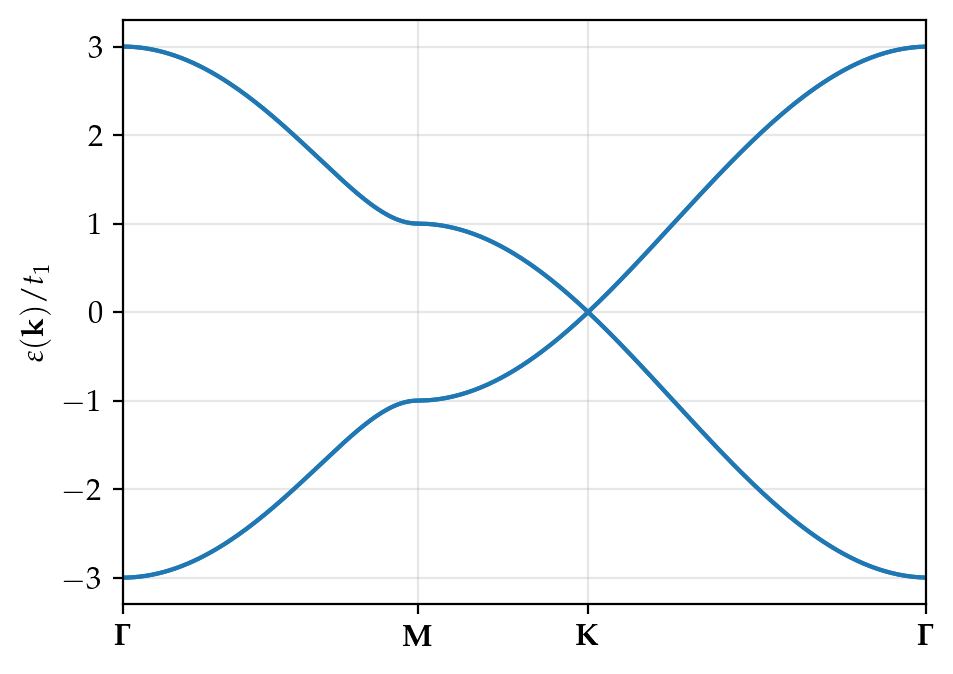

In [8]:
plt.plot(g.ell,g.bands/2.8922,color='tab:blue')

plt.grid(True,alpha=0.3)
plt.xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
plt.xlim((g.ell[0],g.ell[-1]))
plt.ylabel('$\\varepsilon(\mathbf{k})/t_1$')

plt.savefig('Fig09_graphene_monolayer_band_structure.svg')

plt.show()